In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [8]:
#charge le fichier csv fiable = ground truth

df = pd.read_csv("dataset_features.csv")
df.head()


,ratio_light,ratio_dark,edge_density,mean_r,mean_g,mean_b,num_blobs,ratio_white,annotation,label_encoded
0,0.073250,0.101375,0.16045,104.896350,101.908375,85.753225,149,0.023900,vide,1
1,0.068000,0.377050,0.11840,76.915775,83.153950,74.600750,69,0.048675,vide,1
2,0.158875,0.133225,0.10280,100.160925,102.090000,80.784475,122,0.064850,vide,1
3,0.002400,0.076525,0.09465,84.971325,94.356400,78.677175,70,0.000950,vide,1
4,0.003525,0.021525,0.03800,98.542875,104.604975,91.757325,31,0.000000,vide,1


In [7]:
# Vérifier les colonnes
print(df.columns)

# Supprimer les lignes vides si besoin
df = df.dropna()

# Vérifier distribution des labels
print(df['annotation'].value_counts())

df.head()


Index(['ratio_light', 'ratio_dark', 'edge_density', 'mean_r', 'mean_g',
       'mean_b', 'num_blobs', 'ratio_white', 'annotation', 'label_encoded'],
      dtype='object')
annotation
vide      96
pleine    89
Name: count, dtype: int64


,ratio_light,ratio_dark,edge_density,mean_r,mean_g,mean_b,num_blobs,ratio_white,annotation,label_encoded
0,0.073250,0.101375,0.16045,104.896350,101.908375,85.753225,149,0.023900,vide,1
1,0.068000,0.377050,0.11840,76.915775,83.153950,74.600750,69,0.048675,vide,1
2,0.158875,0.133225,0.10280,100.160925,102.090000,80.784475,122,0.064850,vide,1
3,0.002400,0.076525,0.09465,84.971325,94.356400,78.677175,70,0.000950,vide,1
4,0.003525,0.021525,0.03800,98.542875,104.604975,91.757325,31,0.000000,vide,1


In [9]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['annotation'])

# Vérifier
print(df[['annotation', 'label_encoded']].drop_duplicates())


   annotation  label_encoded
0        vide              1
20     pleine              0


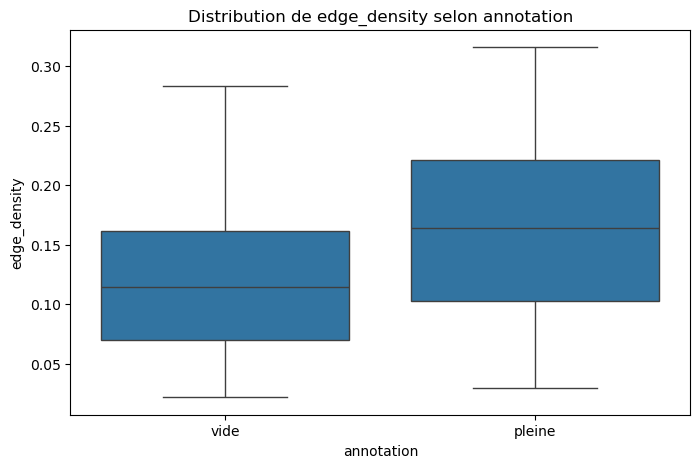

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='annotation', y='edge_density')
plt.title("Distribution de edge_density selon annotation")
plt.show()


In [16]:
#charge les prédictions MC depuis la DB

import sqlite3

conn = sqlite3.connect("app.db")
df_db = pd.read_sql_query("SELECT * FROM images", conn)
conn.close()

df_db.head()


,id,filename,path,upload_date,annotation,ratio_light,ratio_dark,edge_density,mean_r,mean_g,mean_b,num_blobs,ratio_white,top_edge_density,mean_saturation
0,2,detect_poubelle/crops/poubelle/0e02598e-acbb-4...,static/uploads/detect_poubelle/crops/poubelle\...,2025-07-05T17:16:21.983972,vide,0.073250,0.101375,0.16045,104.896350,101.908375,85.753225,149,0.023900,0.187572,71.945073
1,3,detect_poubelle/crops/poubelle/3f53a459-b46f-4...,static/uploads/detect_poubelle/crops/poubelle\...,2025-07-05T17:16:24.293071,vide,0.068000,0.377050,0.11840,76.915775,83.153950,74.600750,69,0.048675,0.163858,75.517909
2,4,detect_poubelle/crops/poubelle/86cd7cf4-726f-4...,static/uploads/detect_poubelle/crops/poubelle\...,2025-07-05T17:16:27.398191,vide,0.158875,0.133225,0.10280,100.160925,102.090000,80.784475,122,0.064850,0.234049,75.748273
3,5,detect_poubelle/crops/poubelle/00204_002.jpg,static/uploads/detect_poubelle/crops/poubelle\...,2025-07-05T17:16:34.011284,vide,0.002400,0.076525,0.09465,84.971325,94.356400,78.677175,70,0.000950,0.179182,52.089532
4,6,detect_poubelle/crops/poubelle/00207_032.jpg,static/uploads/detect_poubelle/crops/poubelle\...,2025-07-05T17:16:45.188038,vide,0.003525,0.021525,0.03800,98.542875,104.604975,91.757325,31,0.000000,0.190632,41.073707


In [21]:
# Vérifier que les tailles sont identiques
print(len(df), len(df_db))

# Si les tailles sont identiques, on ajoute la colonne MC directement
if len(df) == len(df_db):
    df_merge = df.copy()
    df_merge['annotation_mc'] = df_db['annotation']
    print("Fusion faite par index !")
else:
    print("⚠️ Attention : longueurs différentes, impossible de fusionner par index.")

df_merge.head(15)


185 185
Fusion faite par index !


,ratio_light,ratio_dark,edge_density,mean_r,mean_g,mean_b,num_blobs,ratio_white,annotation,label_encoded,annotation_mc
0,0.073250,0.101375,0.160450,104.896350,101.908375,85.753225,149,0.023900,vide,1,vide
1,0.068000,0.377050,0.118400,76.915775,83.153950,74.600750,69,0.048675,vide,1,vide
2,0.158875,0.133225,0.102800,100.160925,102.090000,80.784475,122,0.064850,vide,1,vide
3,0.002400,0.076525,0.094650,84.971325,94.356400,78.677175,70,0.000950,vide,1,vide
4,0.003525,0.021525,0.038000,98.542875,104.604975,91.757325,31,0.000000,vide,1,vide
5,0.013250,0.053075,0.078625,96.828825,101.632450,95.186275,49,0.000275,vide,1,vide
6,0.112350,0.015375,0.230850,127.847125,120.607325,116.046600,237,0.011000,vide,1,vide
7,0.001500,0.314225,0.050700,78.985825,77.955125,80.881825,48,0.000000,vide,1,vide
8,0.003550,0.088875,0.121225,72.847800,87.488650,77.502150,77,0.000025,vide,1,vide
9,0.076700,0.024175,0.146525,103.811750,116.384800,109.025625,102,0.014875,vide,1,pleine


In [22]:
df_merge['mc_encoded'] = le.transform(df_merge['annotation_mc'])


In [23]:
print("=== Évaluation MC ===")
print(classification_report(df_merge['label_encoded'], df_merge['mc_encoded'], target_names=le.classes_))


=== Évaluation MC ===
              precision    recall  f1-score   support

      pleine       0.66      0.65      0.66        89
        vide       0.68      0.69      0.68        96

    accuracy                           0.67       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.67      0.67      0.67       185



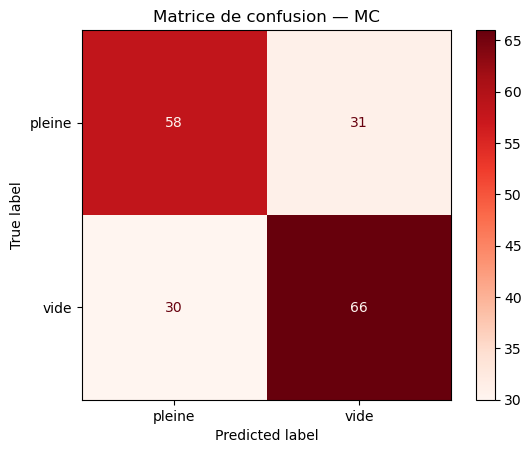

In [24]:
ConfusionMatrixDisplay.from_predictions(df_merge['label_encoded'], df_merge['mc_encoded'], display_labels=le.classes_, cmap="Reds")
plt.title("Matrice de confusion — MC")
plt.show()
